In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,mean_squared_error,r2_score,confusion_matrix
from sklearn.model_selection import train_test_split

df=pd.read_csv(r"C:\Users\ALEXIS\Documents\AXIELS\Documentos Alexis\Estudio\Cursos virtuales\datos y visualizacion MIN-TIC\python\Fraudulent_E-Commerce_Transaction_Data.csv", sep=",", encoding="latin1")
print(df.head(2))
print(df.columns.unique())

                         Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               58.09  2024-02-20 05:58:41  bank transfer      electronics   
1              389.96  2024-02-25 08:09:45     debit card      electronics   

   Quantity  Customer Age Customer Location Device Used       IP Address  \
0         1            17     Amandaborough      tablet   212.195.49.198   
1         2            40      East Timothy     desktop  208.106.249.121   

                          Shipping Address  \
0         Unit 8934 Box 0058\nDPO AA 05437   
1  634 May Keys\nPort Cherylview, NV 75063   

                           Billing Address  Is Fraudulent  Account Age Days  \
0         Unit 8934 Box 0058\nDPO AA 05437              0                3

In [15]:
df = df.dropna()
print(df.isna().sum())

#Eliminar columnas no utiles
df = df.drop(['Transaction ID', 'Customer ID','Customer Location', 'IP Address', 'Shipping Address', 'Billing Address'],axis=1)

#TRATAMIENTO DE DATOS
newcolumns={
    'Transaction Amount':'Monto de transaccion',
    'Transaction Date':'Fecha de transaccion',
    'Payment Method':'Metodo de pago',
    'Product Category':'Categoria de producto',
    'Quantity':'Cantidad',
    'Customer Age':'Edad del cliente',
    'Device Used':'Dispositivo utilizado',
    'Is Fraudulent':'Es fraudulenta',
    'Account Age Days':'Dias de antiguedad de la cuenta',
    'Transaction Hour': 'Hora de transaccion'
    }


Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [16]:

#Renombrado de columnas
df.rename(columns=newcolumns, inplace=True)

print("Columnas despues renombrado:", df.columns.tolist())

#Transformar data de   tiempo
df['Fecha de transaccion'] = pd.to_datetime(df['Fecha de transaccion'], format="%Y-%m-%d %H:%M:%S", errors='coerce')#→ convertir datos de fechs str a datatime



#DATOS UNICOS DE  METODO DE PAGO
print(df['Metodo de pago'].unique())
#['bank transfer' 'debit card' 'PayPal' 'credit card']→transformar a enteros

df['Metodo de pago']=df['Metodo de pago'].replace('bank transfer','0')
df['Metodo de pago']=df['Metodo de pago'].replace('debit card','1')
df['Metodo de pago']=df['Metodo de pago'].replace('PayPal','2')
df['Metodo de pago']=df['Metodo de pago'].replace('credit card','3')
df['Metodo de pago']=df['Metodo de pago'].astype(int)

#DATOS UNICOS DE CATEGORIA DE PRODUCTO
print(df['Categoria de producto'].unique())
#['electronics' 'home & garden' 'clothing' 'toys & games' 'health & beauty']
df['Categoria de producto']=df['Categoria de producto'].replace('electronics','0')
df['Categoria de producto']=df['Categoria de producto'].replace('home & garden','1')
df['Categoria de producto']=df['Categoria de producto'].replace('clothing','2')
df['Categoria de producto']=df['Categoria de producto'].replace('toys & games','3')
df['Categoria de producto']=df['Categoria de producto'].replace('health & beauty','4')
df['Categoria de producto']=df['Categoria de producto'].astype(int)


#DATOS UNICOS DE DISPOSITIVOS UTILIZADOS
print(df['Dispositivo utilizado'].unique())
#['tablet' 'desktop' 'mobile']
df['Dispositivo utilizado']=df['Dispositivo utilizado'].replace('tablet','0')
df['Dispositivo utilizado']=df['Dispositivo utilizado'].replace('desktop','1')
df['Dispositivo utilizado']=df['Dispositivo utilizado'].replace('mobile','2')
df['Dispositivo utilizado']=df['Dispositivo utilizado'].astype(int)

#DATOS UNICOS DE ES FRAUDULENTA
#print(df['Es fraudulenta'].unique())#→ VARIABLE DE DISPERSION
#[0 1]


print(df.dtypes)


Columnas despues renombrado: ['Monto de transaccion', 'Fecha de transaccion', 'Metodo de pago', 'Categoria de producto', 'Cantidad', 'Edad del cliente', 'Dispositivo utilizado', 'Es fraudulenta', 'Dias de antiguedad de la cuenta', 'Hora de transaccion']
['bank transfer' 'debit card' 'PayPal' 'credit card']
['electronics' 'home & garden' 'clothing' 'toys & games' 'health & beauty']
['tablet' 'desktop' 'mobile']
Monto de transaccion                      float64
Fecha de transaccion               datetime64[ns]
Metodo de pago                              int32
Categoria de producto                       int32
Cantidad                                    int64
Edad del cliente                            int64
Dispositivo utilizado                       int32
Es fraudulenta                              int64
Dias de antiguedad de la cuenta             int64
Hora de transaccion                         int64
dtype: object


         Monto de transaccion Fecha de transaccion  Metodo de pago  \
0                       58.09  2024-02-20 05:58:41               0   
1                      389.96  2024-02-25 08:09:45               1   
2                      134.19  2024-03-18 03:42:55               2   
3                      226.17  2024-03-16 20:41:31               0   
4                      121.53  2024-01-15 05:08:17               0   
...                       ...                  ...             ...   
1472947                208.48  2024-01-12 23:39:55               2   
1472948                231.57  2024-03-27 04:31:45               3   
1472949                101.80  2024-01-31 23:51:42               0   
1472950                 61.80  2024-01-12 16:21:32               0   
1472951                376.44  2024-02-19 18:57:20               0   

         Categoria de producto  Cantidad  Edad del cliente  \
0                            0         1                17   
1                            0     

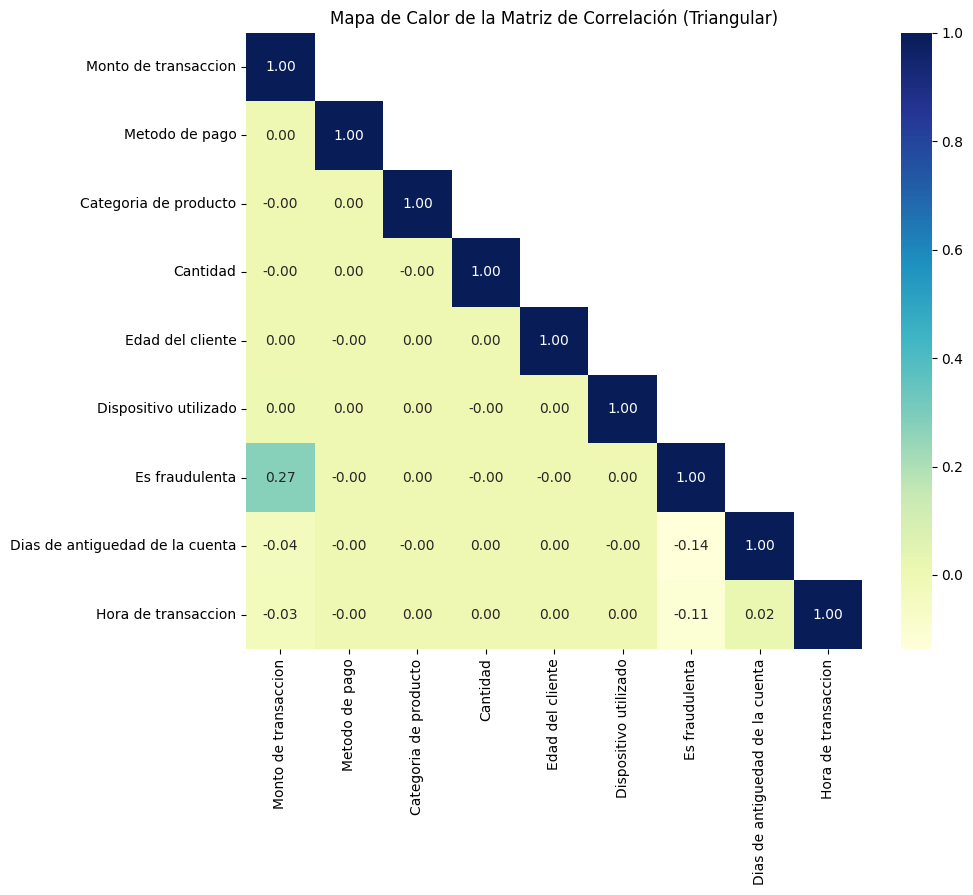

In [17]:
#CORELACION

df_corr = df.drop(['Fecha de transaccion'],axis=1).corr()
print(df)
# Crear una máscara para la mitad superior de la matriz de correlación
mask = np.triu(np.ones_like(df_corr, dtype=bool), k=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap='YlGnBu', annot=True, fmt=".2f", mask=mask, square=True)
plt.title('Mapa de Calor de la Matriz de Correlación (Triangular)')
plt.show()

#Es fraudulenta,Dias de antiguedad de la cuenta,Hora de transaccion

In [18]:

#MODELO DE REGRESION LOGISTICO
#la unica variable discreta es  la columna Es fraude por ello sera  la que utilizaremos de foco

X=np.array(df[['Dias de antiguedad de la cuenta','Hora de transaccion']])
y=df['Es fraudulenta']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

regrlogis=LogisticRegression(random_state=0)
regrlogis.fit(X_train,y_train)

y_predict=regrlogis.predict(X_test)

print("El valor del  accuracy_score: ",accuracy_score(y_test, y_predict))
print("El valor de MSE es : ",mean_squared_error(y_test, y_predict))
print("El valor de R2 es : ",r2_score(y_test, y_predict))
print("La matriz de confusion es: ",confusion_matrix(y_test, y_predict).ravel())
#RANDOM FOREST
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)

predict=model.predict(X_test)
print("El valor del  accuracy_score RandomForest: ",accuracy_score(y_test, predict))
print("El valor de MSE RandomForest es : ",mean_squared_error(y_test, predict))
print("El valor de R2 RandomForest es : ",r2_score(y_test, predict))
print("La matriz de confusion RandomForest es: ",confusion_matrix(y_test, predict).ravel())


El valor del  accuracy_score:  0.9497167259013344
El valor de MSE es :  0.050283274098665606
El valor de R2 es :  -0.05294554968582221
La matriz de confusion es:  [279778      0  14813      0]
El valor del  accuracy_score RandomForest:  0.9497167259013344
El valor de MSE RandomForest es :  0.050283274098665606
El valor de R2 RandomForest es :  -0.05294554968582221
La matriz de confusion RandomForest es:  [279778      0  14813      0]


Mean squared error: 69583.88
Variance score: 0.08
Mean squared error: 69583.88
Variance score: 0.08


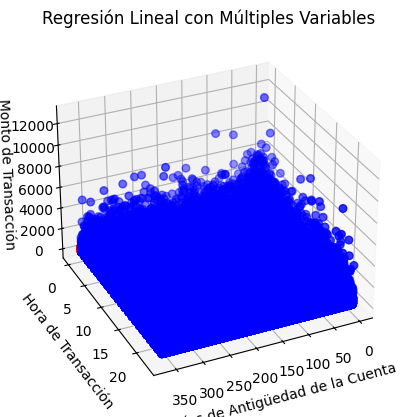

In [19]:

#MODELO DE REGRESIÓN LINEAL MULTIPLE
#Separacion de las variables predictoras y la variable objetivo
y=df['Monto de transaccion'].values
X=np.array(df[['Es fraudulenta', 'Dias de antiguedad de la cuenta','Hora de transaccion']])

#Separacion de las variables de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#Creacion y entrenamos del modelo de regresion
regLinealMultiple=linear_model.LinearRegression()
regLinealMultiple.fit(X_train, y_train)


#Se crean las predicciones con las X_test
y_pred = regLinealMultiple.predict(X_test)


# Evaluacion del Modelo
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

#Random forest regressor
regrandomfo= RandomForestRegressor(random_state=0)
regrandomfo.fit(X_train, y_train)

y_pred=regLinealMultiple.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


# Graficar la regresión en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(
    np.linspace(X[:, 1].min(), X[:, 1].max(), num=10),
    np.linspace(X[:, 2].min(), X[:, 2].max(), num=10)
)

# Calculamos los valores del plano para los puntos x e y
nuevoX = regLinealMultiple.coef_[1] * xx
nuevoY = regLinealMultiple.coef_[2] * yy

# Calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = nuevoX + nuevoY + regLinealMultiple.intercept_

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos de entrenamiento en 3D
ax.scatter(X_train[:, 1], X_train[:, 2], y_train, c='blue', s=30)

# Graficamos en rojo los puntos de predicción en 3D
ax.scatter(X_test[:, 1], X_test[:, 2], y_pred, c='red', s=40)

# Configuramos la visualización de la cámara
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Días de Antigüedad de la Cuenta')
ax.set_ylabel('Hora de Transacción')
ax.set_zlabel('Monto de Transacción')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.show()